In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

275 183


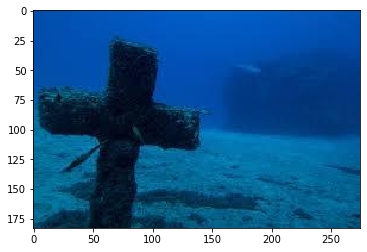

In [2]:
# reading image and its parameters
origImg = cv2.imread('../Raw/362_img_.png')
origImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2RGB)

height = origImg.shape[0]
width = origImg.shape[1]
print(width,height)
plt.imshow(origImg)

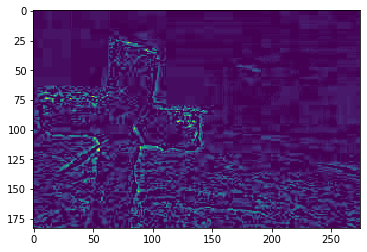

In [3]:
r,g,b = cv2.split(origImg)
plt.imshow(r)
plt.savefig('redOriginal.png',format = "png", dpi = 300)

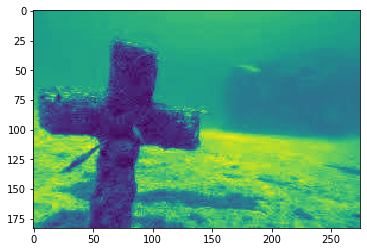

In [4]:
plt.imshow(g)

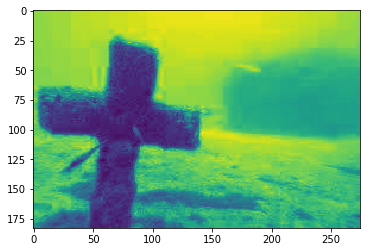

In [5]:
plt.imshow(b)

In [6]:
#normalising r,g,b to range [0,1]

rW = np.divide(r,255)
gW = np.divide(g,255)
bW = np.divide(b,255)


print("\nmeanRed")
meanRed = np.sum(rW)/rW.size
print(meanRed)
print(np.sum(rW),rW.size)

print("\nmeanGreen")
meanGreen = np.sum(gW)/gW.size
print(meanGreen)
print(np.sum(gW),gW.size)

print("\nmeanBlue")
meanBlue = np.sum(bW)/bW.size
print(meanBlue)
print(np.sum(bW),bW.size)



meanRed
0.01485193302358201
747.4235294117647 50325

meanGreen
0.28862628210747787
14525.117647058823 50325

meanBlue
0.524209033439506
26380.819607843136 50325


In [7]:
# compensating red and blue channel

for i in range(height):
    for j in range(width):
        rW[i][j] += (meanGreen - meanRed)*(1-rW[i][j])*gW[i][j]

print(abs(meanBlue-meanGreen))
if(abs(meanBlue-meanGreen) > 0.1):
    for i in range(height):
        for j in range(width):
            bW[i][j] += (meanGreen - meanBlue)*(1-bW[i][j])*gW[i][j]

0.2355827513320281


In [8]:
# de-normalising data
rW = np.array(rW)*255
gW = np.array(gW)*255
bW = np.array(bW)*255

rW = np.around(rW)
rW = rW.astype(np.uint8)

gW = np.around(gW)
gW = gW.astype(np.uint8)

bW = np.around(bW)
bW = bW.astype(np.uint8)

In [9]:
AfterComp = cv2.merge((rW,gW,bW))

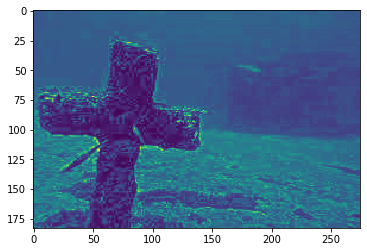

In [10]:
plt.imshow(rW)
plt.savefig('redCompensated.png',format = "png", dpi = 300)

# print(rW)

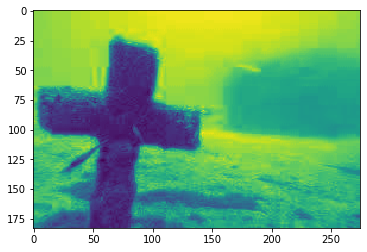

In [11]:
plt.imshow(bW)

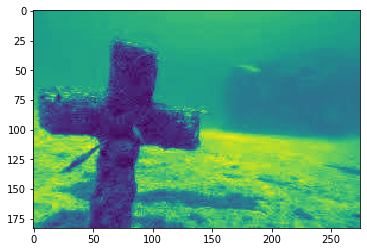

In [12]:
plt.imshow(gW)

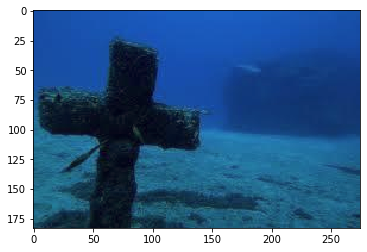

In [13]:
plt.imshow(AfterComp)

In [14]:
def GrayWorld(img,rF,gF,bF):

    # Applying gray world on image

    scale = np.sum(img)/np.size(img)
    print(scale)

    redM = np.sum(rF)/rF.size
    greenM = np.sum(gF)/gF.size
    blueM = np.sum(bF)/bF.size


    rF = np.array(rF)* scale / redM
    gF = np.array(gF)* scale / greenM
    bF = np.array(bF)* scale / blueM
    

    rF = np.around(rF)
    rF = rF.astype(np.uint8)

    gF = np.around(gF)
    gF = gF.astype(np.uint8)

    bF = np.around(bF)
    bF = bF.astype(np.uint8)

    AfterGrayWorld = cv2.merge((rF,gF,bF))
    
    return AfterGrayWorld

74.60192747143567


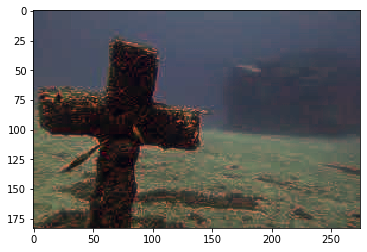

In [15]:
AfterGrayWorld = GrayWorld(AfterComp,rW,gW,bW)
plt.imshow(AfterGrayWorld)
plt.savefig('OurWhiteBalance.png',format = "png", dpi = 300)

70.3534161284981


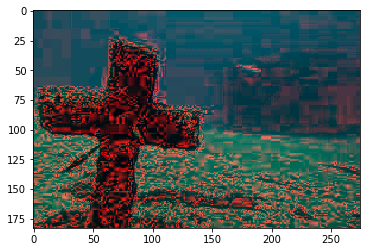

In [16]:
DirectGrayWorld = GrayWorld(origImg,r,g,b)
plt.imshow(DirectGrayWorld)
plt.savefig('DirectGrayWorld.png',format = "png", dpi = 300)